In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [4]:
df = pd.read_csv('./Data Files/co2_mm_mlo.csv')

In [5]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [6]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [7]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [8]:
df.index = df['date']

In [10]:
df.index.freq = 'MS'

In [11]:
df.head()

,year,month,decimal_date,average,interpolated,date
date,,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71,1958-03-01
1958-04-01,1958,4,1958.292,317.45,317.45,1958-04-01
1958-05-01,1958,5,1958.375,317.50,317.50,1958-05-01
1958-06-01,1958,6,1958.458,NaN,317.10,1958-06-01
1958-07-01,1958,7,1958.542,315.86,315.86,1958-07-01


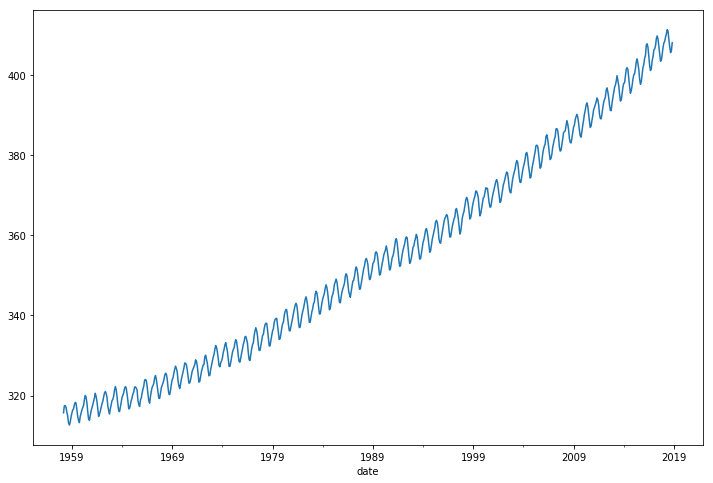

In [12]:
df['interpolated'].plot(figsize=(12,8))

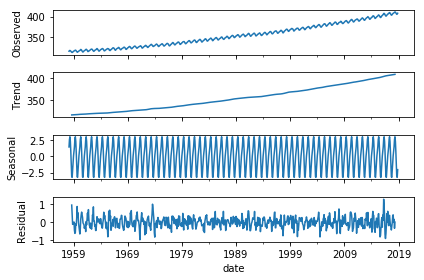

In [14]:
results = seasonal_decompose(df['interpolated'], model='add')
results.plot();

In [15]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood                -208.330
Date:                            Fri, 27 Dec 2019   AIC                            430.659
Time:                                    14:52:35   BIC                            462.791
Sample:                                         0   HQIC                           443.058
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.685e-05      0.000      0.340      0.734      -0.000       0.001
ma.L1         -0.3734      0.034    -11.021      0.000      -0.440      -0.307
ar.S.L12       0.0315      0.011      2.910      0.004       0.010       0.053
ar.S.L24       0.9679      0.011     89.058      0.000       0.947       0.989
ma.S.L12       0.1277      0.033      3.843      0.000       0.063       0.193
ma.S.L24      -0.8650      0.042    -20.567      0.000      -0.947      -0.783
sigma2         0.0952      0.006     16.815      0.000       0.084       0.106
===================================================================================
Ljung-Box (Q):                       50.34   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.13   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
len(df)

729

In [17]:
train = df.iloc[:717]
test = df.iloc[717:]

In [18]:
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(2, 0, 2, 12))

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood                -205.142
Date:                            Fri, 27 Dec 2019   AIC                            422.285
Time:                                    14:56:48   BIC                            449.727
Sample:                                03-01-1958   HQIC                           432.882
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.794      0.000      -0.438      -0.303
ar.S.L12       0.8750      0.124      7.084      0.000       0.633       1.117
ar.S.L24       0.1246      0.124      1.009      0.313      -0.118       0.367
ma.S.L12      -0.7366      0.121     -6.101      0.000      -0.973      -0.500
ma.S.L24      -0.1120      0.104     -1.073      0.283      -0.317       0.093
sigma2         0.0960      0.005     20.133      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

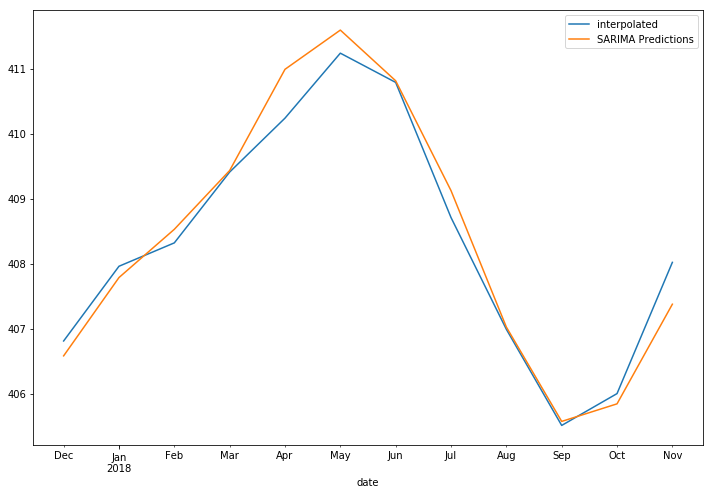

In [23]:
test['interpolated'].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
error = rmse(test['interpolated'], predictions)

In [26]:
error

0.3458131141226658

In [27]:
test['interpolated'].mean()

408.3333333333333

In [29]:
%%markdown

# FORECAST INTO THE FUTURE


# FORECAST INTO THE FUTURE

In [30]:
model = SARIMAX(df['interpolated'],order=(0, 1, 1), seasonal_order=(2, 0, 2, 12))
results = model.fit()

In [34]:
start = len(df)
end = start + 12
forecast = results.predict(start, end, type='levels').rename('SARIMA Forecast')

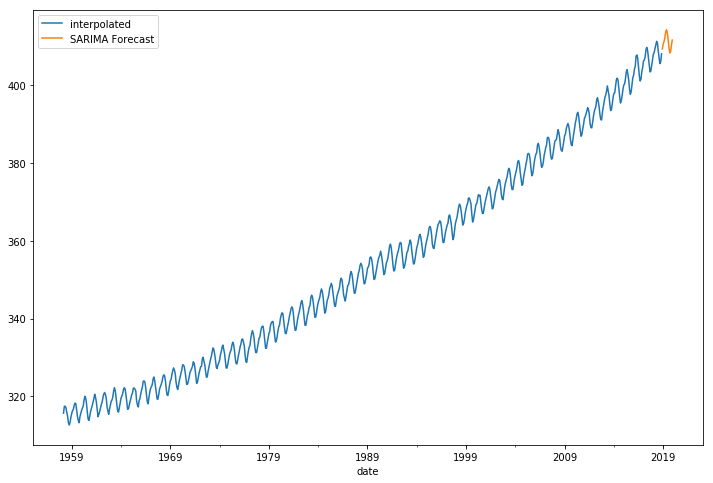

In [35]:
df['interpolated'].plot(figsize=(12,8), legend=True);
forecast.plot(legend=True);